<a href="https://colab.research.google.com/github/kassy75035/Computer-Vision/blob/main/Day008_sobel_gaussian_blur_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

In [1]:
from google.colab.patches import cv2_imshow # for image display
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import cv2
import numpy as np
img_path = '/content/gdrive/My Drive/Colab Notebooks/ComputerVision/data/lena.png'
img = cv2.imread(img_path)

## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

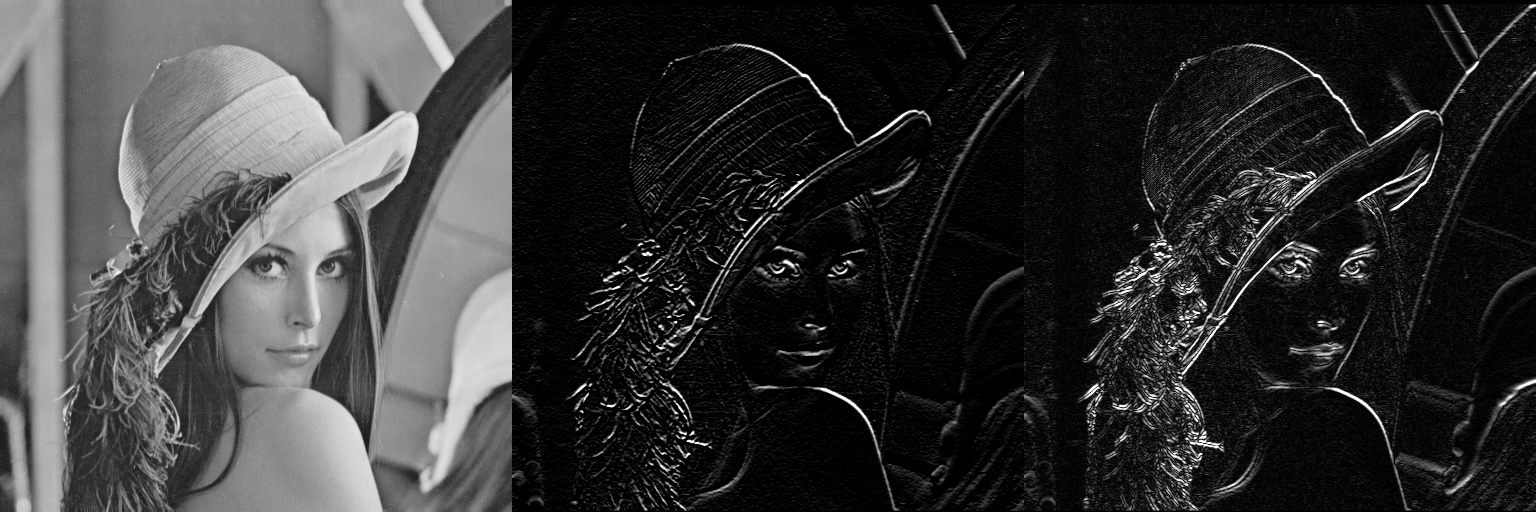

In [4]:
# 轉為灰階圖片
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)

# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=0, dy=1, ksize=3)

# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 = cv2.convertScaleAbs(img_sobel_x)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_x_uint8))
# while True:
#     # 比較 Sobel 邊緣檢測的過程中針對負數操作的不同產生的差異
#     cv2.imshow('Edge Detection', img_show)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break
cv2_imshow(img_show)

### 比較一次與兩次計算偏微分的結果

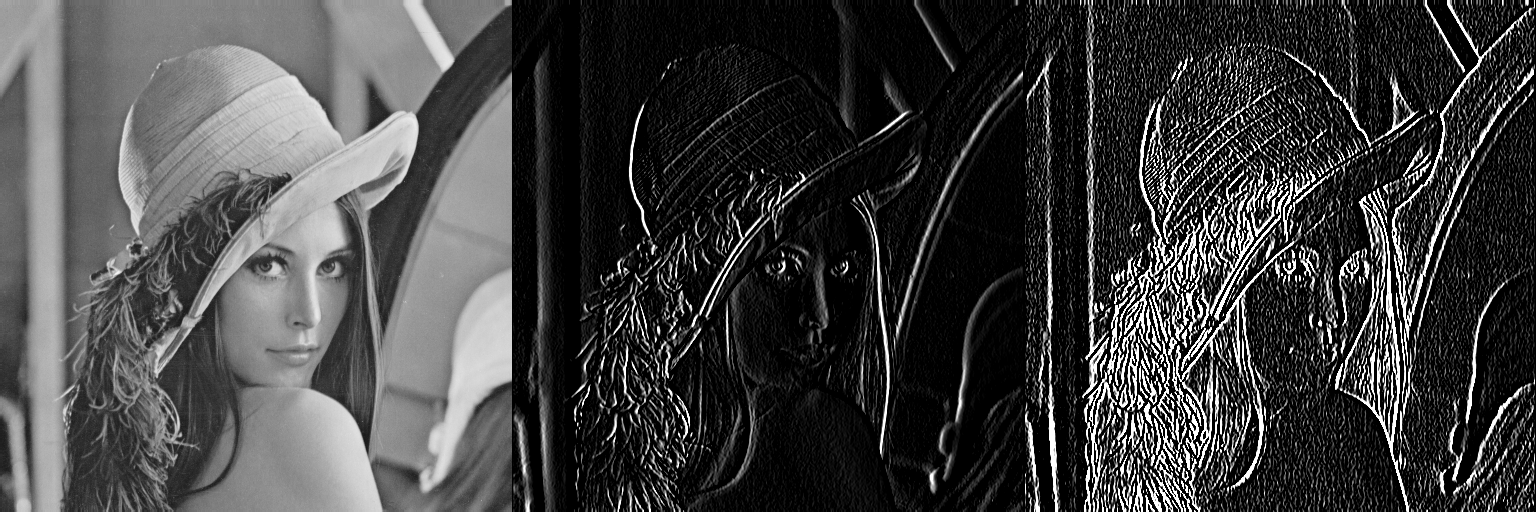

In [7]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 求一次導數取得邊緣檢測結果
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)

# 求二次導數取得邊緣檢測結果
img_sobel_xx = cv2.Sobel(img_sobel_x, cv2.CV_16S, dx=1, dy=0, ksize=3)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
# while True:
#     cv2.imshow('Edge Detection', img_show)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break
cv2_imshow(img_show)